In [23]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#lendo o csv cadastral

csv_url = "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-dados-cadastrais-dos-revendedores-varejistas-de-combustiveis-automotivos/dados-cadastrais-revendedores-varejistas-combustiveis-automoveis.csv"
df = pd.read_csv(csv_url, sep=";" , dtype=str)
#df

In [21]:
#separando os postos do Rj

rio = df[(df["UF"]=="RJ")
#& (df["MUNICIPIO"]=="RIO DE JANEIRO")
]
contagem = rio.groupby("BANDEIRA", dropna=False).size().reset_index(name="qtd")
contagem.sort_values("qtd", ascending=False, inplace=True)

contagem
#rio.info()

,BANDEIRA,qtd
2,BANDEIRA BRANCA,964
8,VIBRA,379
6,RAIZEN,356
3,IPIRANGA,277
1,ALE,42
0,AIR BP,4
4,NEXTA,3
5,PETROBRASIL,1
7,SP,1


In [17]:
csv_url = "C:/faculdade/tic/liquidos_Vendas_Atual.csv"
df1 = pd.read_csv(csv_url, sep=";" , dtype=str, encoding='latin-1')
df1['Quantidade de Produto (mil m³)'] = df1['Quantidade de Produto (mil m³)'].str.replace(',', '.').astype(float)


In [18]:
# Agrupando por agente regulado
agente_regulado_contagem = df1.groupby("Agente Regulado", dropna=False).size().reset_index(name="qtd")
agente_regulado_contagem.sort_values("qtd", ascending=False, inplace=True)
agente_regulado_contagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 199 to 176
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Agente Regulado  208 non-null    object
 1   qtd              208 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


In [19]:
df_rj = df1[df1["UF Destino"]=="RJ"]
agentes = df_rj.groupby("Agente Regulado").size()
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22477 entries, 1 to 903690
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ano                             22477 non-null  object 
 1   Mês                             22477 non-null  object 
 2   Agente Regulado                 22477 non-null  object 
 3   Código do Produto               22477 non-null  object 
 4   Nome do Produto                 22477 non-null  object 
 5   Descrição do Produto            22477 non-null  object 
 6   Região Origem                   22477 non-null  object 
 7   UF Origem                       22477 non-null  object 
 8   Região Destinatário             22477 non-null  object 
 9   UF Destino                      22477 non-null  object 
 10  Mercado Destinatário            22477 non-null  object 
 11  Quantidade de Produto (mil m³)  22477 non-null  float64
dtypes: float64(1), object(11)
memory usa

In [20]:

volume_por_agente = df_rj.groupby("Agente Regulado")["Quantidade de Produto (mil m³)"].sum()

# Opcional, mas recomendado: Ordenar do maior para o menor e exibir
volume_por_agente_ordenado = volume_por_agente.sort_values(ascending=False)
volume_por_agente_ordenado

Agente Regulado
VIBRA ENERGIA S.A                                 12317.900939
RAIZEN S.A.                                       12020.487832
IPIRANGA PRODUTOS DE PETRÓLEO S.A                  9540.197801
76 OIL DISTRIBUIDORA DE COMBUSTÍVEIS S/A           4468.023403
TOBRAS DISTRIBUIDORA DE COMBUSTÍVEIS LTDA.         1962.287247
                                                      ...     
PETROGOIÁS DISTRIBUIDORA DE PETRÓLEO LTDA.            0.015000
FAN - DISTRIBUIDORA DE PETRÓLEO LTDA.                 0.010000
GRAN PETRO DISTRIBUIDORA DE COMBUSTÍVEIS LTDA.        0.005000
TOWER BRASIL PETRÓLEO LTDA.                           0.005000
TRANSO COMBUSTÍVEIS LTDA                              0.002000
Name: Quantidade de Produto (mil m³), Length: 67, dtype: float64

C:\Users\filip\AppData\Local\Temp\ipykernel_11676\1730529139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='qtd', y='BANDEIRA', data=contagem_top15, palette='viridis', orient='h')


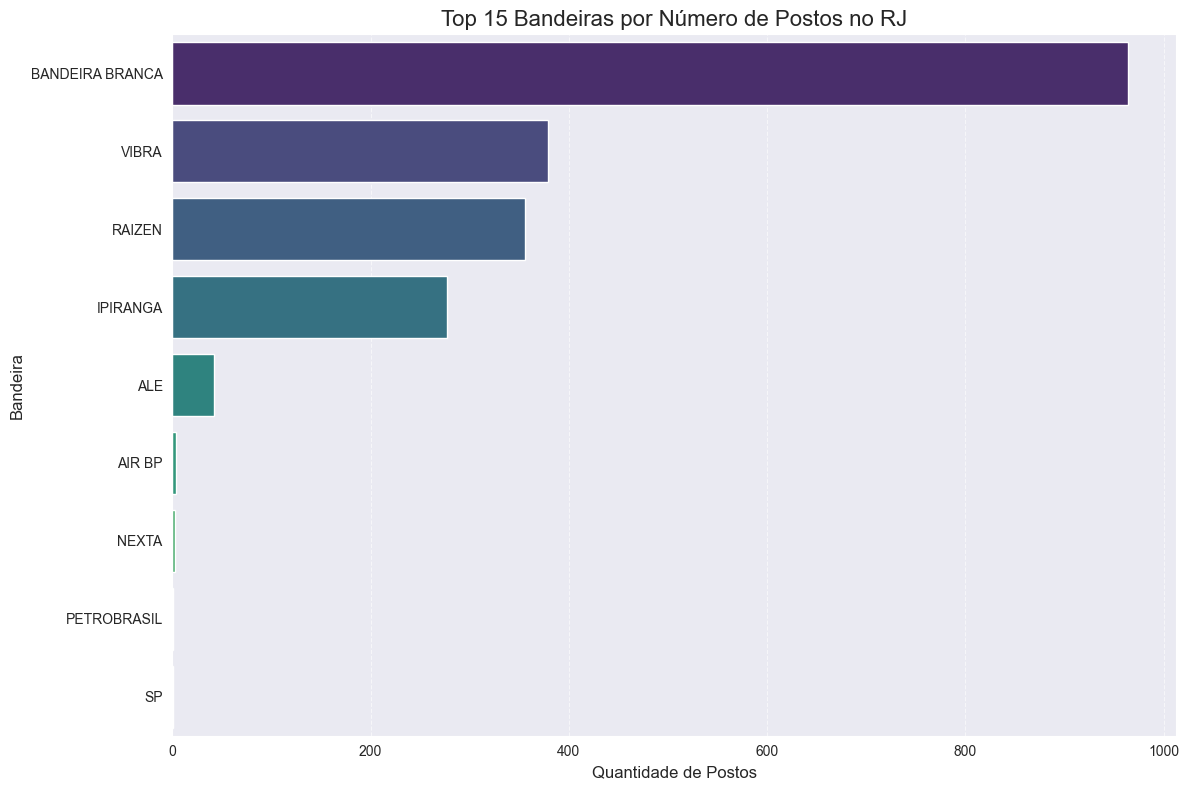

In [24]:
contagem_top15 = contagem.head(15)

# Definindo o tamanho da figura
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras horizontais
sns.barplot(x='qtd', y='BANDEIRA', data=contagem_top15, palette='viridis', orient='h')

# Adicionando Título e Rótulos
plt.title('Top 15 Bandeiras por Número de Postos no RJ', fontsize=16)
plt.xlabel('Quantidade de Postos', fontsize=12)
plt.ylabel('Bandeira', fontsize=12)

# Adicionando uma grade para facilitar a leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta o gráfico para não cortar os rótulos

C:\Users\filip\AppData\Local\Temp\ipykernel_11676\3467097730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_top15.values, y=volume_top15.index, palette='plasma', orient='h')


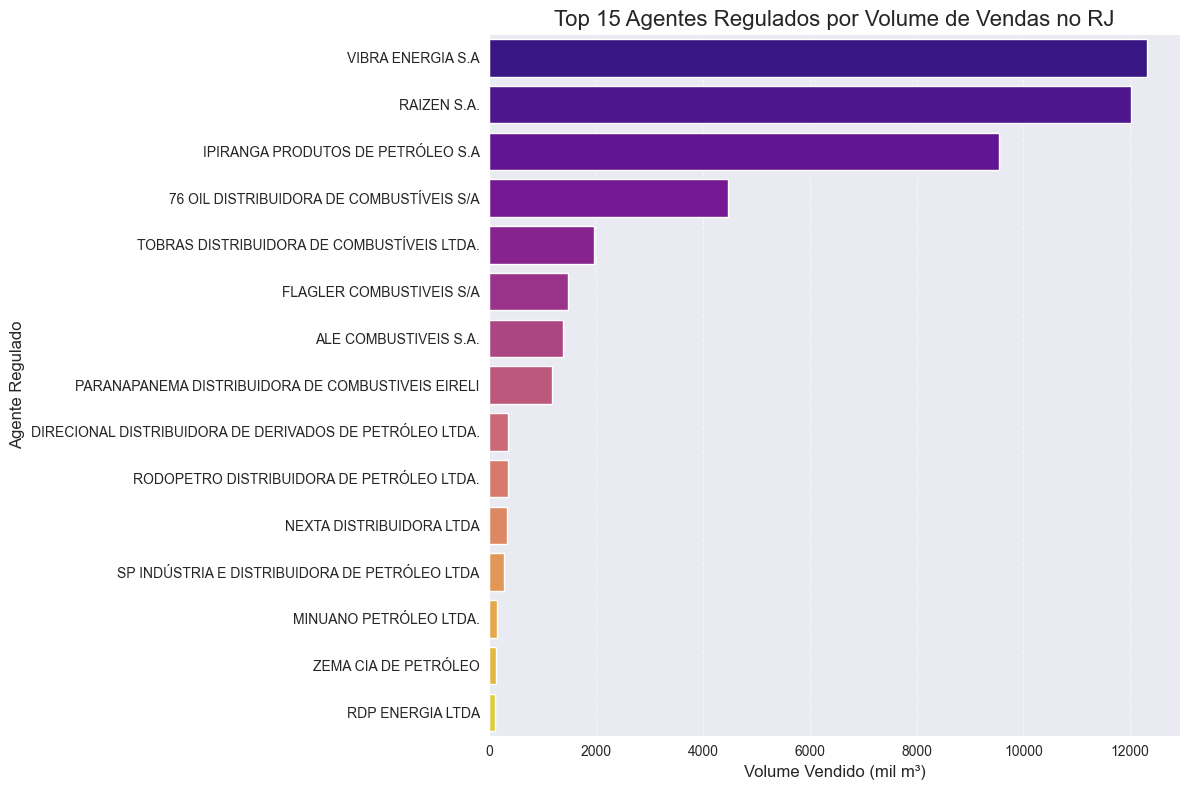

In [25]:
volume_top15 = volume_por_agente_ordenado.head(15)

plt.figure(figsize=(12, 8))

# Criando o gráfico de barras (o .index tem os nomes e o .values tem os números)
sns.barplot(x=volume_top15.values, y=volume_top15.index, palette='plasma', orient='h')

plt.title('Top 15 Agentes Regulados por Volume de Vendas no RJ', fontsize=16)
plt.xlabel('Volume Vendido (mil m³)', fontsize=12)
plt.ylabel('Agente Regulado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()